In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn import datasets
import seaborn as sns

In [2]:
#Print many statements at same time using the below command
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactive="all"

In [3]:
#Load dataset
iris=sns.load_dataset('iris')
#Head: only the first five rows
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [4]:
#Separe features and target
x_train = iris.drop('species',axis=1)
y_train = iris['species']
x_train.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [5]:
#Build clusters
from sklearn.cluster import KMeans
num_of_clusters = range(2,11)
error=[]

for num_clusters in num_of_clusters:
    clusters = KMeans(num_clusters)
    clusters.fit(x_train)
    error.append(clusters.inertia_/100)
df = pd.DataFrame({"Cluster_Numbers": num_of_clusters, "Error_Term":error})
df

,Cluster_Numbers,Error_Term
0,2,1.523480
1,3,0.788514
2,4,0.572555
3,5,0.464462
4,6,0.390400
5,7,0.346201
6,8,0.300631
7,9,0.282569
8,10,0.261967


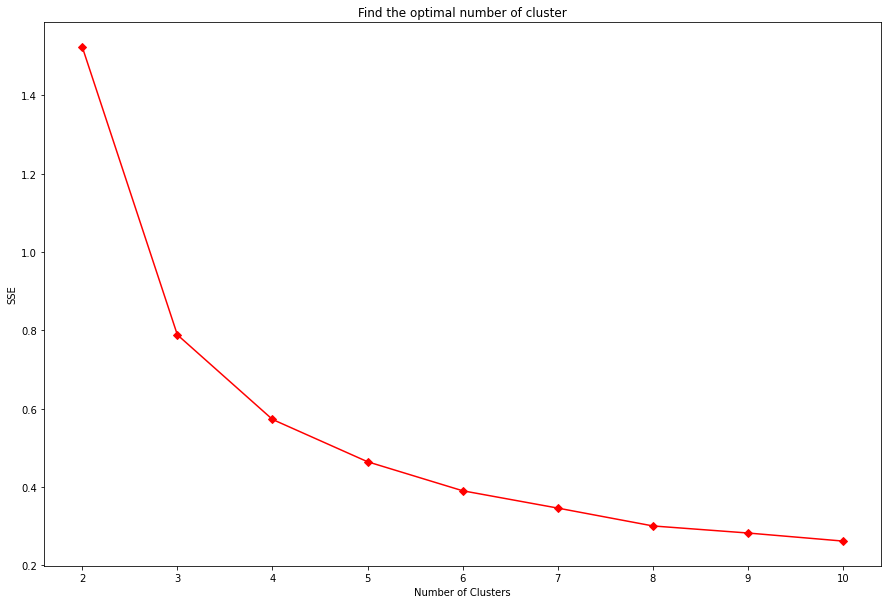

In [6]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,10))
plt.plot(df.Cluster_Numbers, df.Error_Term, marker = "D", color = 'red')
plt.xlabel('Number of Clusters')
plt.ylabel('SSE')
plt.title('Find the optimal number of cluster')
plt.show()

In [7]:
#Build with 3 clusters
clusters = KMeans(n_clusters=3, verbose=1)
clusters.fit(x_train)
clusters.labels_

Initialization complete
Iteration 0, inertia 109.69000000000001
Iteration 1, inertia 82.83604674005949
Iteration 2, inertia 81.74960206772624
Iteration 3, inertia 80.80637599999999
Iteration 4, inertia 79.87357983461304
Iteration 5, inertia 79.34436414532675
Iteration 6, inertia 78.92130972222225
Iteration 7, inertia 78.85566582597727
Converged at iteration 7: strict convergence.
Initialization complete
Iteration 0, inertia 93.65
Iteration 1, inertia 81.32806489357331
Iteration 2, inertia 80.0594266200554
Iteration 3, inertia 79.57585726935399
Iteration 4, inertia 78.99749895643232
Iteration 5, inertia 78.85566582597727
Converged at iteration 5: strict convergence.
Initialization complete
Iteration 0, inertia 120.62999999999997
Iteration 1, inertia 81.14832183472946
Iteration 2, inertia 79.19714263977781
Iteration 3, inertia 78.851441426146
Converged at iteration 3: strict convergence.
Initialization complete
Iteration 0, inertia 130.55
Iteration 1, inertia 88.1979617777778
Iteration 2

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 1, 1, 2, 2, 2, 2, 1, 2, 1, 2, 1, 2, 2, 1, 1, 2, 2, 2, 2,
       2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 1])

In [8]:
x_train['Cluster'] = clusters.labels_
print(x_train.head())
print(x_train['Cluster'])

   sepal_length  sepal_width  petal_length  petal_width  Cluster
0           5.1          3.5           1.4          0.2        0
1           4.9          3.0           1.4          0.2        0
2           4.7          3.2           1.3          0.2        0
3           4.6          3.1           1.5          0.2        0
4           5.0          3.6           1.4          0.2        0
0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    1
147    2
148    2
149    1
Name: Cluster, Length: 150, dtype: int32


In [9]:
x_train.groupby("Cluster").size()

Cluster
0    50
1    62
2    38
dtype: int64

In [10]:
clust_profile = pd.pivot_table(x_train, values=['sepal_length','sepal_width','petal_width','petal_length'],index='Cluster',aggfunc=np.mean)
np.round(clust_profile,2)

,petal_length,petal_width,sepal_length,sepal_width
Cluster,,,,
0,1.46,0.25,5.01,3.43
1,4.39,1.43,5.90,2.75
2,5.74,2.07,6.85,3.07


In [11]:
#Applying kmeans to the dataset / Creating the kmeans classifier
#random_state is the seed used by the random number generator.
#If random_state is None, the random number generator is the RandomState instance used by np.random.
kmeans = KMeans(n_clusters = 3, max_iter = 300, random_state = 5)
y_kmeans = kmeans.fit_predict(x_train)
print(y_kmeans)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 2 2 2 0 2 2 2 2
 2 2 0 0 2 2 2 2 0 2 0 2 0 2 2 0 0 2 2 2 2 2 0 2 2 2 2 0 2 2 2 0 2 2 2 0 2
 2 0]


In [12]:
#Convert the x_train dataframe to a numpy array
x_train_arr = x_train.values
print(type(x_train_arr))

<class 'numpy.ndarray'>


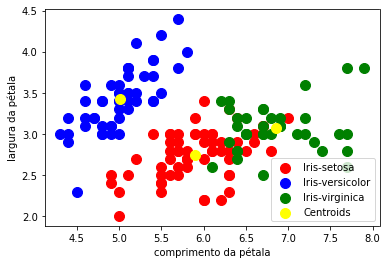

In [13]:
#Visualising the clusters
plt.scatter(x_train_arr[y_kmeans == 0, 0], x_train_arr[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Iris-setosa')
plt.scatter(x_train_arr[y_kmeans == 1, 0], x_train_arr[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Iris-versicolor')
plt.scatter(x_train_arr[y_kmeans == 2, 0], x_train_arr[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Iris-virginica')

#Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], s = 100, c = 'yellow', label = 'Centroids')
plt.xlabel("comprimento da pétala")
plt.ylabel("largura da pétala")

plt.legend()
plt.show()